In [586]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [587]:
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns


In [279]:
from google.colab import files
uploaded = files.upload()

Saving weeklycrct.xlsx to weeklycrct (2).xlsx


In [588]:
data = pd.read_excel ('weeklycrct.xlsx')


In [589]:
data.isnull().sum(axis = 0)


From Date    0
PM2.5        0
NO           0
NO2          0
NOx          0
NH3          0
SO2          0
Ozone        0
PM2.5y1      2
NOy1         2
NO2y1        2
NOxy1        2
NH3y1        2
SO2y1        2
Ozoney1      2
PM2.5y2      2
NOy2         2
NO2y2        2
NOxy2        2
NH3y2        2
SO2y2        2
Ozoney2      2
PM2.5y3      1
NOy3         1
NO2y3        1
NOxy3        1
NH3y3        1
SO2y3        1
Ozoney3      1
dtype: int64

In [590]:
data = data.fillna(data.median())


In [591]:
data.isnull().sum(axis = 0)


From Date    0
PM2.5        0
NO           0
NO2          0
NOx          0
NH3          0
SO2          0
Ozone        0
PM2.5y1      0
NOy1         0
NO2y1        0
NOxy1        0
NH3y1        0
SO2y1        0
Ozoney1      0
PM2.5y2      0
NOy2         0
NO2y2        0
NOxy2        0
NH3y2        0
SO2y2        0
Ozoney2      0
PM2.5y3      0
NOy3         0
NO2y3        0
NOxy3        0
NH3y3        0
SO2y3        0
Ozoney3      0
dtype: int64

In [592]:

data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [593]:
import datetime as dt

In [594]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [595]:
df=data.loc['0':'207']

In [596]:
df

,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3,year,month,day
0,735966,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333,2016,1,3
1,735973,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000,2016,1,10
2,735980,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857,2016,1,17
3,735987,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714,2016,1,24
4,735994,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571,2016,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,737387,101.091429,51.498571,58.585714,64.812857,15.740000,8.118571,29.711429,106.172857,54.095714,57.744286,55.042857,37.981429,4.904286,23.264286,142.857143,80.625714,45.074286,74.138571,49.790000,3.578571,16.118571,149.784286,121.402857,75.078571,138.612857,203.751429,11.587746,17.128777,2019,11,24
204,737394,63.288571,53.741429,50.064286,75.085714,12.037143,2.608571,19.504286,173.848571,143.770000,63.578571,151.897143,52.612857,5.732857,18.121429,144.028571,45.332857,45.222857,75.832857,37.271429,5.592857,26.178571,147.950000,81.650000,60.125714,98.311429,152.627143,11.661439,16.815036,2019,12,1
205,737401,143.041429,60.198571,56.500000,91.804286,19.447143,6.052857,22.581429,154.002857,123.677143,66.648571,122.448571,61.412857,5.291429,16.441429,152.064286,134.887143,36.749524,144.431513,58.198571,4.803483,17.601753,74.350000,164.774286,69.271429,170.718571,248.184286,11.735132,16.501295,2019,12,8
206,737408,139.978571,70.320000,74.011429,98.191429,10.748571,5.511429,17.747143,155.460000,51.312857,44.624286,43.031429,36.337143,5.230000,9.402857,95.821429,61.235714,25.596190,83.172353,43.650000,3.976781,20.910985,279.941429,132.675714,66.684286,143.141429,215.230000,11.808825,16.187554,2019,12,15


In [597]:
df.columns

Index(['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day'],
      dtype='object')

In [598]:
X1 = df[['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day']]
Y1 = df['NO2']

In [599]:
X1

,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3,year,month,day
0,735966,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333,2016,1,3
1,735973,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000,2016,1,10
2,735980,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857,2016,1,17
3,735987,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714,2016,1,24
4,735994,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571,2016,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,737387,101.091429,51.498571,58.585714,64.812857,15.740000,8.118571,29.711429,106.172857,54.095714,57.744286,55.042857,37.981429,4.904286,23.264286,142.857143,80.625714,45.074286,74.138571,49.790000,3.578571,16.118571,149.784286,121.402857,75.078571,138.612857,203.751429,11.587746,17.128777,2019,11,24
204,737394,63.288571,53.741429,50.064286,75.085714,12.037143,2.608571,19.504286,173.848571,143.770000,63.578571,151.897143,52.612857,5.732857,18.121429,144.028571,45.332857,45.222857,75.832857,37.271429,5.592857,26.178571,147.950000,81.650000,60.125714,98.311429,152.627143,11.661439,16.815036,2019,12,1
205,737401,143.041429,60.198571,56.500000,91.804286,19.447143,6.052857,22.581429,154.002857,123.677143,66.648571,122.448571,61.412857,5.291429,16.441429,152.064286,134.887143,36.749524,144.431513,58.198571,4.803483,17.601753,74.350000,164.774286,69.271429,170.718571,248.184286,11.735132,16.501295,2019,12,8
206,737408,139.978571,70.320000,74.011429,98.191429,10.748571,5.511429,17.747143,155.460000,51.312857,44.624286,43.031429,36.337143,5.230000,9.402857,95.821429,61.235714,25.596190,83.172353,43.650000,3.976781,20.910985,279.941429,132.675714,66.684286,143.141429,215.230000,11.808825,16.187554,2019,12,15


In [600]:
Y1

0      137.310000
1      141.035079
2       66.203492
3       57.379990
4       78.249649
          ...    
203     58.585714
204     50.064286
205     56.500000
206     74.011429
207     35.768571
Name: NO2, Length: 208, dtype: float64

In [38]:
from google.colab import files
files.download('weeklycrct.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [601]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state= 36)


In [602]:
forest =  RandomForestRegressor(n_estimators=1500,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=7,random_state=20)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=7, min_samples_split=7,
                      n_estimators=1500, random_state=20)

In [603]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.7938183868217986

Score on test data: 0.8587489984083736

Root Mean Squared Error: 11.382464014557561

Overall model accuracy: 0.8587489984083736


In [706]:
#test=data.loc['207':'219']
#test=data.loc['220':'222']
#test=data.loc['223':'227']
#test=data.loc['228':'229']
test=data.loc['230':'256']
X=test[['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day']]

In [707]:
predict=forest.predict(X)

In [708]:
predict

array([33.93550943, 33.37614483, 33.71793716, 29.56206661, 28.68048361,
       30.30290304, 26.46634724, 29.17319658, 32.63584318, 36.91881143,
       36.79912088, 40.61864226, 40.59873688, 63.55144631, 44.62009219,
       31.1557777 , 33.88161303, 35.25139951, 31.12549179, 36.68015656,
       42.20617104, 48.65782211, 46.77826903, 67.07807526, 54.03883507,
       29.1771509 , 34.10189806])

In [709]:
#dates=data.loc['212':'219','From Date']
#dates=data.loc['220':'222','From Date']
#dates=data.loc['223':'227','From Date']
#dates=data.loc['228':'229','From Date']
dates=data.loc['230':'256','From Date']

In [710]:
X['From Date']= dates.values

In [711]:
X.columns

Index(['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day'],
      dtype='object')

In [712]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [713]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [714]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [715]:
X['pred']=predict

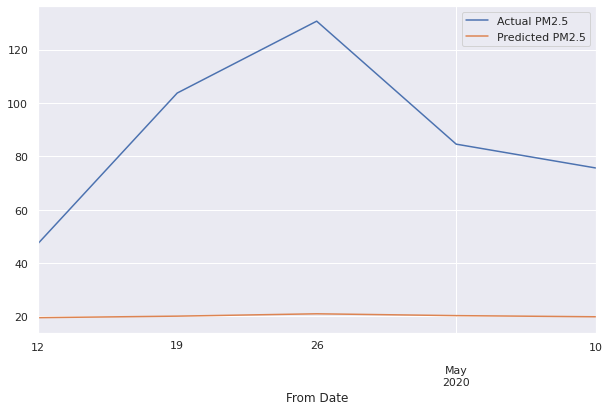

In [670]:
test['PM2.5'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM2.5')

In [671]:
np.sqrt(mean_squared_error(test['PM2.5'],X['pred']))

73.52148689247608

In [571]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 3.2052628471827727
MSE: 33.100508821178835
RMSE: 5.75330416553643
R-Squared: 0.9850643505919839


In [572]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 63.93937260082474
MSE: 12729.767215261818
RMSE: 112.82627005827064
R-Squared: -0.1312138165813741


# 3rd plot

In [716]:
testcase = pd.DataFrame()

In [717]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [718]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [719]:
testcase

,test,pred,Corrected
167,26.744286,26.487295,32.240599
56,42.094286,42.235403,36.482098
188,15.211429,14.547140,20.300444
48,69.271429,67.603649,73.356953
92,9.141429,14.461580,8.708276
2,66.203492,67.474136,61.720832
14,78.244737,78.496355,72.743051
126,83.614286,123.936950,118.183646
104,27.587143,28.071723,22.318419
28,78.237860,78.473390,72.720086


In [720]:
"""testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')"""

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [721]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8786942893089182

In [722]:
test2020=pd.DataFrame()

In [723]:
test2020['test']=test['NO2']
test2020['pred']=X['pred']

In [724]:
test2020.index=test.index

In [725]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

In [726]:
test2020

,test,pred,Corrected
From Date,,,
2020-05-31,32.970000,33.935509,28.182205
2020-06-07,32.314286,33.376145,27.622841
2020-06-14,32.480000,33.717937,27.964633
2020-06-21,30.567143,29.562067,35.315371
2020-06-28,29.098571,28.680484,34.433788
2020-07-05,31.707143,30.302903,36.056207
2020-07-12,26.465714,26.466347,20.713043
2020-07-19,29.644286,29.173197,34.926501
2020-07-26,32.024286,32.635843,26.882539


In [727]:
test2020["Corrected"].describe()

count    27.000000
mean     38.827772
std      11.961242
min      20.713043
25%      28.923345
50%      36.056207
75%      44.628279
max      72.831379
Name: Corrected, dtype: float64

In [275]:
test2020["Corrected"].min()

17.791416020923368

In [276]:
test2020["Corrected"].max()

268.68336964492545

In [115]:
test2020["Corrected"].mean()

136.54028529672857

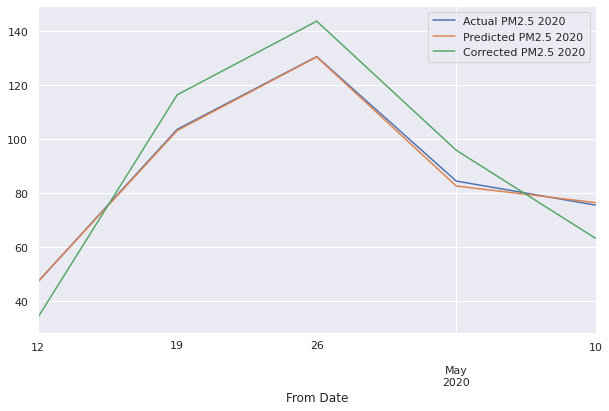

In [216]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [109]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.9209768140970864

In [111]:
test2020[corrected].median() 

NameError: ignored